Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 6000
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left


Task 1


In [28]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[ 3.94121367 -0.82002559 -0.25965936 ... -0.05114983  1.5091794
  2.00695527]


(array([   8.,   69.,  339.,  910., 1702., 1555.,  992.,  356.,   63.,
           6.]),
 array([-10.99139889,  -8.80173185,  -6.61206481,  -4.42239777,
         -2.23273073,  -0.04306369,   2.14660335,   4.33627039,
          6.52593743,   8.71560447,  10.90527151]),
 <BarContainer object of 10 artists>)

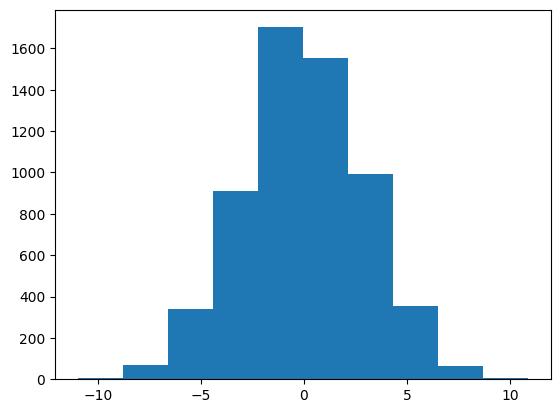

In [29]:
plt.hist(sample)

In [30]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = sample.min()
max_smpl = sample.max()
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 14
Длина интервала: 1.5640478857215072
Максимальный: 10.905271511914453
Минимальный элемент: -10.991398888186648 


In [31]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -10.991398888186648 - -9.42735100246514
2 interval: -9.42735100246514 - -7.863303116743634
3 interval: -7.863303116743634 - -6.299255231022126
4 interval: -6.299255231022126 - -4.735207345300619
5 interval: -4.735207345300619 - -3.171159459579112
6 interval: -3.171159459579112 - -1.6071115738576047
7 interval: -1.6071115738576047 - -0.04306368813609751
8 interval: -0.04306368813609751 - 1.5209841975854097
9 interval: 1.5209841975854097 - 3.085032083306917
10 interval: 3.085032083306917 - 4.649079969028424
11 interval: 4.649079969028424 - 6.213127854749931
12 interval: 6.213127854749931 - 7.777175740471439
13 interval: 7.777175740471439 - 9.341223626192946
14 interval: 9.341223626192946 - 10.905271511914453


In [32]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')



1 interval: 2
2 interval: 23
3 interval: 77
4 interval: 245
5 interval: 518
6 interval: 921
7 interval: 1242
8 interval: 1164
9 interval: 926
10 interval: 529
11 interval: 255
12 interval: 80
13 interval: 17
14 interval: 1

Сумма частот - 1.0


14
[-10.99139889  -9.427351    -7.86330312  -6.29925523  -4.73520735
  -3.17115946  -1.60711157  -0.04306369   1.5209842    3.08503208
   4.64907997   6.21312785   7.77717574   9.34122363  10.90527151]
14
[-10.991398888186648, -9.42735100246514, -7.863303116743634, -6.299255231022126, -4.735207345300619, -3.171159459579112, -1.6071115738576047, -0.04306368813609751, 1.5209841975854097, 3.085032083306917, 4.649079969028424, 6.213127854749931, 7.777175740471439, 9.341223626192946, 10.905271511914453]


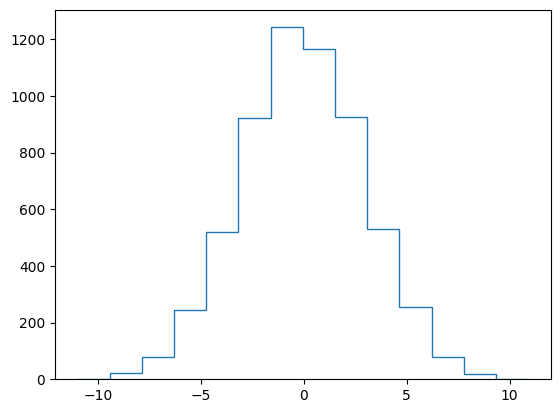

In [33]:
counts, bins = np.histogram(sample, bins='sturges')
plt.stairs(counts, bins)
print(len(counts))
print(bins)

print((len(frequency)))
print(intervals)

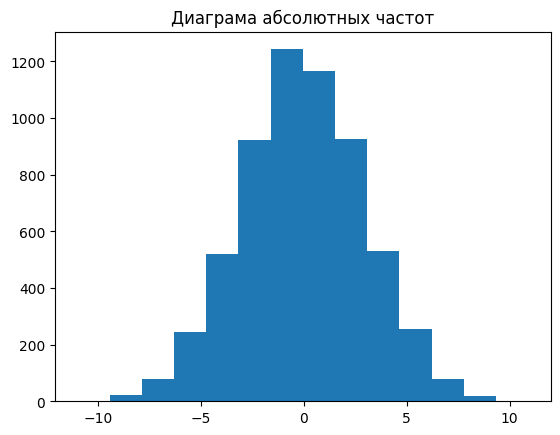

In [34]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [35]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.00021312220449028267
2 interval: 0.002450905351638251
3 interval: 0.008205204872875883
4 interval: 0.026107470050059627
5 interval: 0.05519865096298321
6 interval: 0.09814277516777517
7 interval: 0.13234888898846553
8 interval: 0.12403712301334452
9 interval: 0.09867558067900088
10 interval: 0.05637082308767977
11 interval: 0.02717308107251104
12 interval: 0.008524888179611306
13 interval: 0.0018115387381674028
14 interval: 0.00010656110224514133


[2.13122204e-04 2.45090535e-03 8.20520487e-03 2.61074701e-02
 5.51986510e-02 9.81427752e-02 1.32348889e-01 1.24037123e-01
 9.86755807e-02 5.63708231e-02 2.71730811e-02 8.52488818e-03
 1.81153874e-03 1.06561102e-04]
0.639366613470848


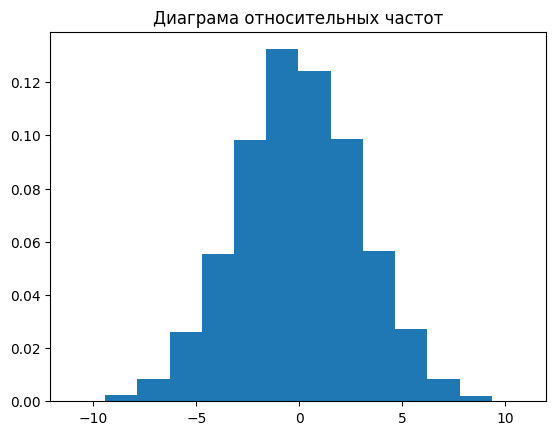

In [36]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

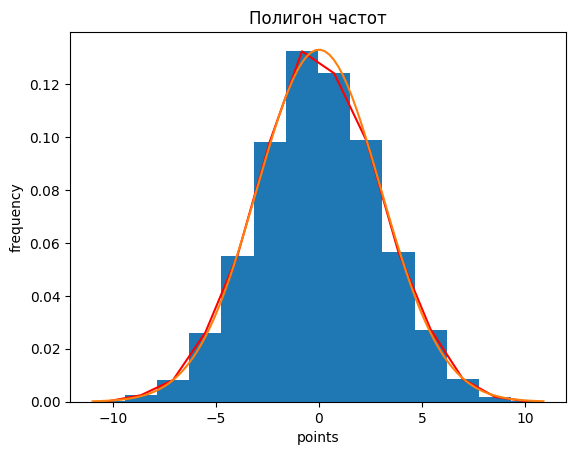

In [37]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [38]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)


Сумма площадей под графиком:  0.9999999999999998


Function graph

In [39]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


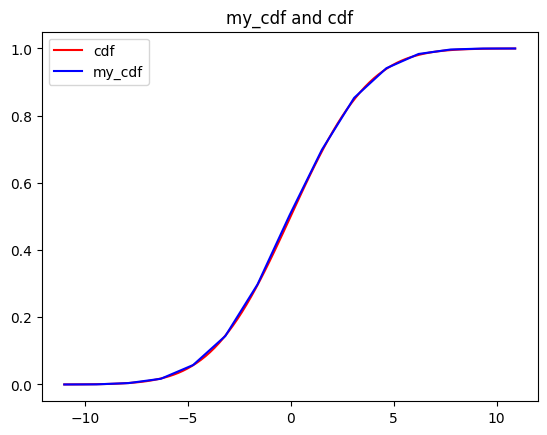

In [40]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------


x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-2.000846
0.50,-0.088068
0.75,2.013524


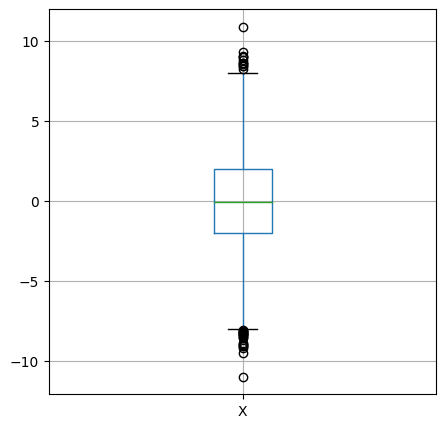

In [41]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [42]:
print(q)
print(f"Вероятность по таблице {0.4599*2}")
print(f"Вероятность по lib {sts.norm().cdf(q)-sts.norm().cdf(-q)}")

prob = 0
for i in sample:
    if i > a - (q*sigma) and i < a+(q*sigma):
        prob += 1
prob /= n
print(f"Статистическая {prob}")

1.75
Вероятность по таблице 0.9198
Вероятность по lib 0.9198816862723658
Статистическая 0.9226666666666666


part 4

In [43]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
statistics.pvariance
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - -0.03930211414559306, 
variacne - 8.720344557121905, 
dev - 2.953022952352708, 
Skewness - -0.01777032463098594, 
Kurtosis - -0.09241258088428372


In [44]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: -0.039302114145593064
Эмпирическая дисперсия: 8.718891166362338
Стандартное отклонение: 2.9527768568522643
S^2: 8.720344557121859
Коэффициент ассимметрии: -0.01777032463098595
Коэффициент эксцесса: -0.09241258088424553
